In [1]:
import wrangle as wr
import split
import acquire
import prepare

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sklearn.preprocessing
import pandas as pd

## Acquring/Prep/Splitting Data

In [2]:
zillow = wr.wrangle_zillow()
target_var = 'taxvaluedollarcnt'
train, validate, test = split.train_validate_test_split(zillow, 
                                                        target_var)

train.head()

(2134889, 8)
(2096851, 8)


,parcelid,bedroomcnt,bathroomcnt,sqr_ft,taxvaluedollarcnt,yearbuilt,taxamount,fips
1349904,11911489,6.0,3.0,2449.0,432773.0,1947,5931.25,6037
258766,17138706,3.0,2.0,1599.0,211452.0,1976,2261.32,6111
1244805,12815284,4.0,3.0,1969.0,380466.0,1965,4570.03,6037
667578,14105307,5.0,2.5,2085.0,202010.0,1955,2527.40,6059
882530,11010017,6.0,5.0,4922.0,1107030.0,2002,13622.19,6037


# Exercise 1: Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution 

## Min/Max Scaling

In [3]:
# define min/max scaler
scaler = sklearn.preprocessing.MinMaxScaler()

In [4]:
# function to returned scaled datasets
min_max_train, min_max_validate, min_max_test = prepare.fit_and_scale(scaler, train, validate, test)

min_max_train.head()

,bedroomcnt,bathroomcnt,sqr_ft,taxvaluedollarcnt,taxamount
0,1.0,0.5,0.401032,0.153359,0.180077
1,0.4,0.3,0.254858,0.074927,0.068345
2,0.6,0.5,0.318487,0.134823,0.138634
3,0.8,0.4,0.338435,0.071581,0.076446
4,1.0,0.9,0.826311,0.392304,0.414230


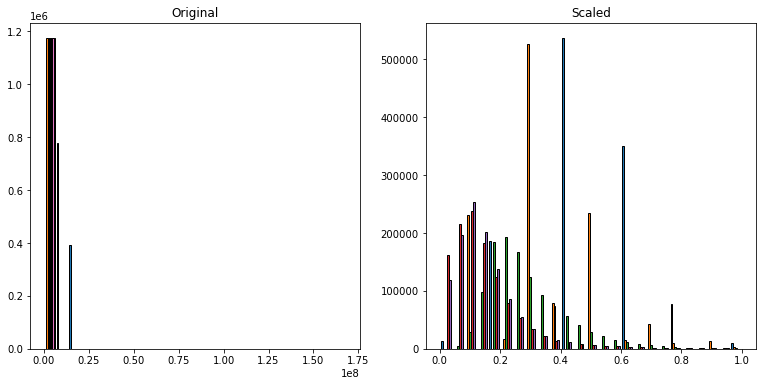

In [5]:
prepare.visualize_scaled_data(train, min_max_train)

## Standard Scaling

In [6]:
# Define standard scaler
scaler = sklearn.preprocessing.StandardScaler()

In [7]:
# function to return scaled datasets
std_train, std_validate, std_test = prepare.fit_and_scale(scaler, train,
                                                          validate, test)
std_train.head()

,bedroomcnt,bathroomcnt,sqr_ft,taxvaluedollarcnt,taxamount
0,3.106760,0.946501,0.843571,0.066865,0.225092
1,-0.315152,-0.216523,-0.259028,-0.570552,-0.692322
2,0.825485,0.946501,0.220926,-0.083783,-0.115188
3,1.966122,0.364989,0.371399,-0.597746,-0.625807
4,3.106760,3.272550,4.051485,2.008763,2.147685


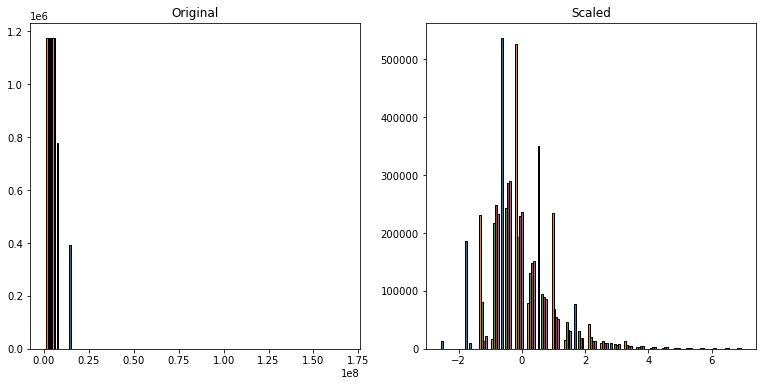

In [8]:
prepare.visualize_scaled_data(train, std_train)

## Robust Scaling

In [9]:
# Defining scaler
scaler = sklearn.preprocessing.RobustScaler()

In [10]:
# return scaled data sets
robust_train, robust_validate, robust_test = prepare.fit_and_scale(scaler, train, validate, test)
robust_train.head()

,bedroomcnt,bathroomcnt,sqr_ft,taxvaluedollarcnt,taxamount
0,3.0,1.0,0.916849,0.327764,0.502283
1,0.0,0.0,-0.013129,-0.337707,-0.481809
2,1.0,1.0,0.391685,0.170486,0.137271
3,2.0,0.5,0.518600,-0.366098,-0.410460
4,3.0,3.0,3.622538,2.355129,2.564609


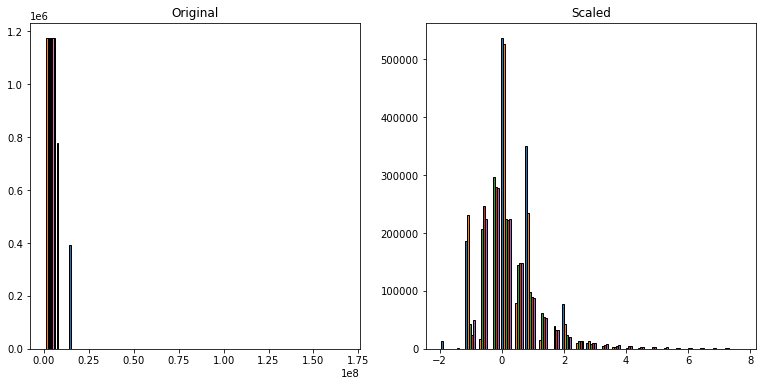

In [11]:
# visualize original vs robust scaled data
prepare.visualize_scaled_data(train, robust_train)

# Exercise 2: Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?


In [12]:
floats = train.select_dtypes(include='float64').columns

robust_train = pd.DataFrame(data=scaler.inverse_transform(robust_train), columns=floats)
robust_train

,bedroomcnt,bathroomcnt,sqr_ft,taxvaluedollarcnt,taxamount
0,6.0,3.0,2449.0,432773.0,5931.25
1,3.0,2.0,1599.0,211452.0,2261.32
2,4.0,3.0,1969.0,380466.0,4570.03
3,5.0,2.5,2085.0,202010.0,2527.40
4,6.0,5.0,4922.0,1107030.0,13622.19
...,...,...,...,...,...
1174231,3.0,2.0,1545.0,327671.0,4082.33
1174232,2.0,1.0,1656.0,32357.0,940.08
1174233,4.0,3.0,2544.0,514071.0,6987.84
1174234,4.0,3.0,2512.0,399925.0,5213.92


In [13]:

train[floats].reset_index().drop(columns='index')

,bedroomcnt,bathroomcnt,sqr_ft,taxvaluedollarcnt,taxamount
0,6.0,3.0,2449.0,432773.0,5931.25
1,3.0,2.0,1599.0,211452.0,2261.32
2,4.0,3.0,1969.0,380466.0,4570.03
3,5.0,2.5,2085.0,202010.0,2527.40
4,6.0,5.0,4922.0,1107030.0,13622.19
...,...,...,...,...,...
1174231,3.0,2.0,1545.0,327671.0,4082.33
1174232,2.0,1.0,1656.0,32357.0,940.08
1174233,4.0,3.0,2544.0,514071.0,6987.84
1174234,4.0,3.0,2512.0,399925.0,5213.92


In [14]:
train[floats].reset_index().drop(columns='index') == robust_train

,bedroomcnt,bathroomcnt,sqr_ft,taxvaluedollarcnt,taxamount
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,True,True,True
3,True,True,True,True,True
4,True,True,True,True,False
...,...,...,...,...,...
1174231,True,True,True,True,True
1174232,True,True,True,True,False
1174233,True,True,True,True,True
1174234,True,True,True,True,True


## Conclusion: 
> The inverse transform function is almost exactly the same but not quite.

### Return robust data back to scaled data

In [15]:
# define scaler
scaler = sklearn.preprocessing.RobustScaler()

# transform train, validate, test w/ robust scaler
robust_train, robust_validate, robust_test = prepare.fit_and_scale(scaler,
                                                                  train,
                                                                  validate,
                                                                  test)
#preview
robust_train.head()

,bedroomcnt,bathroomcnt,sqr_ft,taxvaluedollarcnt,taxamount
0,3.0,1.0,0.916849,0.327764,0.502283
1,0.0,0.0,-0.013129,-0.337707,-0.481809
2,1.0,1.0,0.391685,0.170486,0.137271
3,2.0,0.5,0.518600,-0.366098,-0.410460
4,3.0,3.0,3.622538,2.355129,2.564609


# Exercise 3: Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

## QuantileTransformer (output_distribution == 'normal')

In [16]:
# define scaler
scaler = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')

In [17]:
# return quant-scaled data to train, validate, and test sets
quant_train, quant_validate, quant_test = prepare.fit_and_scale(scaler,
                                                                train,
                                                                validate,
                                                                test)
quant_train.head()

,bedroomcnt,bathroomcnt,sqr_ft,taxvaluedollarcnt,taxamount
0,5.199338,0.943656,0.947187,0.400902,0.596328
1,-0.252311,-0.166367,-0.016310,-0.540973,-0.801823
2,0.763030,0.943656,0.476619,0.220757,0.176895
3,1.727466,0.502074,0.597935,-0.593218,-0.676683
4,5.199338,2.432017,2.643233,1.691024,1.744737


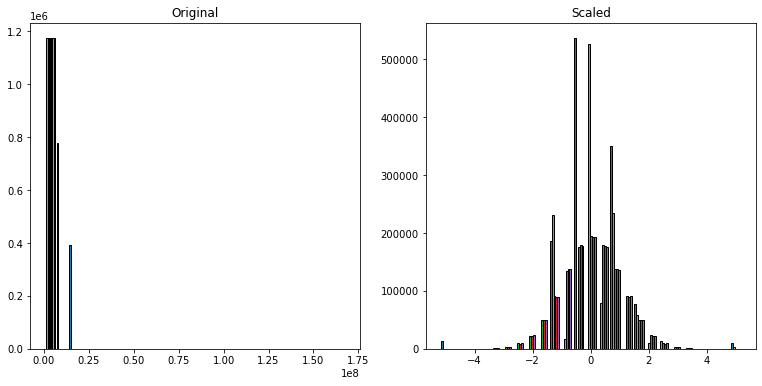

In [18]:
# visualize original vs quant-scaled
prepare.visualize_scaled_data(train, quant_train)

# Exercise 4: Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

## QuantileTransformer (output_distribution == 'uniform' (default))

In [19]:
# define scaler
scaler = sklearn.preprocessing.QuantileTransformer()

In [20]:
# return quant-scaled data
quant_uni_train, quant_uni_validate, quant_uni_test = prepare.fit_and_scale(scaler,
                                                                           train,
                                                                           validate,
                                                                           test)
quant_uni_train.head()

,bedroomcnt,bathroomcnt,sqr_ft,taxvaluedollarcnt,taxamount
0,1.000000,0.828829,0.826326,0.659700,0.723098
1,0.396396,0.437437,0.491992,0.294866,0.210751
2,0.775275,0.828829,0.680681,0.589958,0.570018
3,0.958959,0.695195,0.723056,0.277974,0.247727
4,1.000000,0.992492,0.996105,0.955848,0.959149


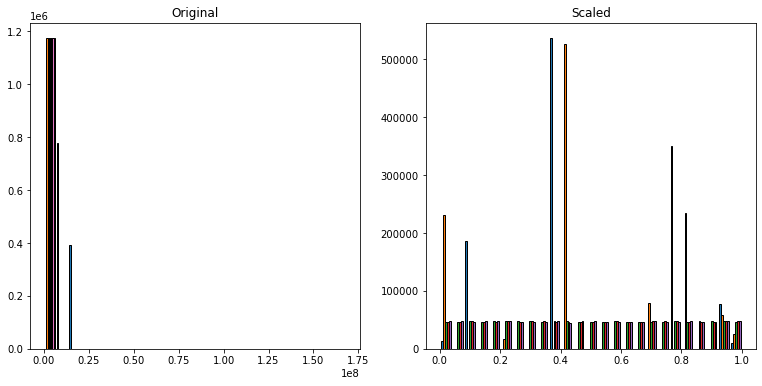

In [21]:
# visualize quant-scaled data
prepare.visualize_scaled_data(train, quant_uni_train)

## Conclusion: 
> It tried to create a normal distribution, but it failed with a few outliers.

# Exercise 5: Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [22]:
# define scaler
scaler = sklearn.preprocessing.RobustScaler()

# return scaled data based on robust scaler
robust_train, robust_validate, robust_test = prepare.fit_and_scale(scaler,
                                                                  train,
                                                                  validate,
                                                                  test)
robust_train.head()

,bedroomcnt,bathroomcnt,sqr_ft,taxvaluedollarcnt,taxamount
0,3.0,1.0,0.916849,0.327764,0.502283
1,0.0,0.0,-0.013129,-0.337707,-0.481809
2,1.0,1.0,0.391685,0.170486,0.137271
3,2.0,0.5,0.518600,-0.366098,-0.410460
4,3.0,3.0,3.622538,2.355129,2.564609
